# Basic EDA of the MeetUp website

In [1]:
%matplotlib inline 

In [2]:
#import the standard packages and read the csv table into a dataframe
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
meetup_df  = pd.read_csv("meetups.csv")

In [3]:
type(meetup_df)

pandas.core.frame.DataFrame

In [4]:
meetup_df.shape # 2259 rows and 9 columns

(2259, 9)

In [5]:
meetup_df.columns

Index([u'category', u'upcoming_meeting_date', u'group_reviews',
       u'group_members', u'upcoming_meetings', u'upcoming_address',
       u'past_meetings', u'upcoming_meeting_time', u'group_name'],
      dtype='object')

In [6]:
meetup_df.head()

,category,upcoming_meeting_date,group_reviews,group_members,upcoming_meetings,upcoming_address,past_meetings,upcoming_meeting_time,group_name
0,Movements,Fri Feb 17,1,149,18,"163 W 23rd Street, New York, NY",296,8:00 PM,"POLITICS FOR A HUMAN COMMUNITY - New York, NY"
1,Family,None,2,103,1,Coming soon,4,None,The New York City Gender Discussion Meetup - N...
2,Tech,Tue Feb 21,21,"1,853",1,NaN,40,6:30 PM,"nycdevops - Brooklyn, NY"
3,Outdoors & Adventure,Sat Apr 22,2,72,1,"FDR BOARDWALK, STATEN ISLAND,New York, NY",15,10:00 AM,German - American Hiking Club of New York and ...
4,Learning,Thu Feb 16,1,62,11,NaN,None,7:30 PM,"NYC Test Prep and Technology Meetup - Astoria, NY"


In [7]:
#Everthing was stored as a string during the scraping process. Therefore, we will need to
#convert some the of the columns to intergers before doing any analysis. But remove commas 
meetup_df['group_members'] = meetup_df['group_members'].str.replace(",","")
meetup_df['upcoming_meetings'] = meetup_df['upcoming_meetings'].str.replace(",","")
meetup_df['past_meetings'] = meetup_df['past_meetings'].str.replace(",","")
meetup_df['group_reviews'] = meetup_df['group_reviews'].str.replace(",","")


In [9]:
#Ask about why I have to run this twice to get floats as the dtype
meetup_df[['group_members','upcoming_meetings','past_meetings','group_reviews']] = meetup_df[['group_members','upcoming_meetings','past_meetings','group_reviews']].apply(lambda x: pd.to_numeric(x, errors='ignore'))
print meetup_df['group_members'].dtype
#meetup_df[['group_members','upcoming_meetings','past_meetings','group_reviews']] = meetup_df[['group_members','upcoming_meetings','past_meetings','group_reviews']].astype(int, raise_on_error=False)
#Replacing None with NAN, which works better with numpy and they are missing values anyway
meetup_df =  meetup_df.replace('None', np.nan)

float64


In [10]:
#Now we want to seperate the upcoming meeting dates to Day and Date 
meetup_df["upcoming_meeting_day"] = meetup_df["upcoming_meeting_date"].str[0:3]
meetup_df["upcoming_meeting_date"] = meetup_df["upcoming_meeting_date"].str.replace('^.{0,4}','')


In [11]:
#Adding the year to the date
meetup_df["upcoming_meeting_date"] = meetup_df["upcoming_meeting_date"] + ', 2017'

In [12]:
# converting the date to a date time object 
# meetup_df["upcoming_meeting_date"] = meetup_df["upcoming_meeting_date"].apply(lambda x: pd.to_datetime(x, format='%b %d, %Y', errors='ignore'))

In [13]:
meetup_df.dtypes

category                  object
upcoming_meeting_date     object
group_reviews            float64
group_members            float64
upcoming_meetings        float64
upcoming_address          object
past_meetings            float64
upcoming_meeting_time     object
group_name                object
upcoming_meeting_day      object
dtype: object

In [158]:
meetup_df.describe()

,group_reviews,group_members,upcoming_meetings,past_meetings
count,2087.000000,1822.000000,1511.000000,959.000000
mean,16.933397,1360.723381,32.825943,315.483837
std,34.180221,2632.779207,137.476575,584.476755
min,1.000000,1.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,591.000000,52793.000000,4493.000000,8067.000000


In [15]:
#What is the most popular group in all of Meetup? 
meetup_df['group_members'].argmax()
meetup_df.iloc[1423]

category                                                              Tech
upcoming_meeting_date                                          Mar 7, 2017
group_reviews                                                          503
group_members                                                        52793
upcoming_meetings                                                        6
upcoming_address         566 LaGuardia Place at Washington Square, New ...
past_meetings                                                          230
upcoming_meeting_time                                              7:00 PM
group_name                                   NY Tech Meetup - New York, NY
upcoming_meeting_day                                                   Tue
Name: 1423, dtype: object

In [16]:
# What is the average group membership? 

In [17]:
meetup_df['group_members'].mean()

1360.7233809001098

In [18]:
meetup_df.groupby(by="category")["group_members"].mean().astype(int)

category
Arts                    1732
Beliefs                  649
Book Clubs               406
Career & Business       1888
Dance                   1092
Family                   432
Fashion & Beauty         710
Film                    1291
Food & Drink            1368
Health & Wellness       1266
Hobbies & Crafts         331
LGBTQ                   1033
Language & Culture      1891
Learning                 655
Movements                706
Music                    949
Outdoors & Adventure    2053
Pets                     302
Photography              922
Sci-Fi & Games           792
Social                  5232
Sports & Fitness        1751
Tech                    4141
Writing                  427
Name: group_members, dtype: int64

In [19]:
cats  = meetup_df["category"].unique()
meetup_df.groupby(by="category")["group_members"].mean()


category
Arts                    1732.200000
Beliefs                  649.700000
Book Clubs               406.681159
Career & Business       1888.734940
Dance                   1092.666667
Family                   432.290909
Fashion & Beauty         710.073171
Film                    1291.197368
Food & Drink            1368.911392
Health & Wellness       1266.223881
Hobbies & Crafts         331.898734
LGBTQ                   1033.224490
Language & Culture      1891.768116
Learning                 655.382716
Movements                706.377778
Music                    949.054348
Outdoors & Adventure    2053.642857
Pets                     302.080645
Photography              922.822222
Sci-Fi & Games           792.038462
Social                  5232.029412
Sports & Fitness        1751.575342
Tech                    4141.575758
Writing                  427.300000
Name: group_members, dtype: float64

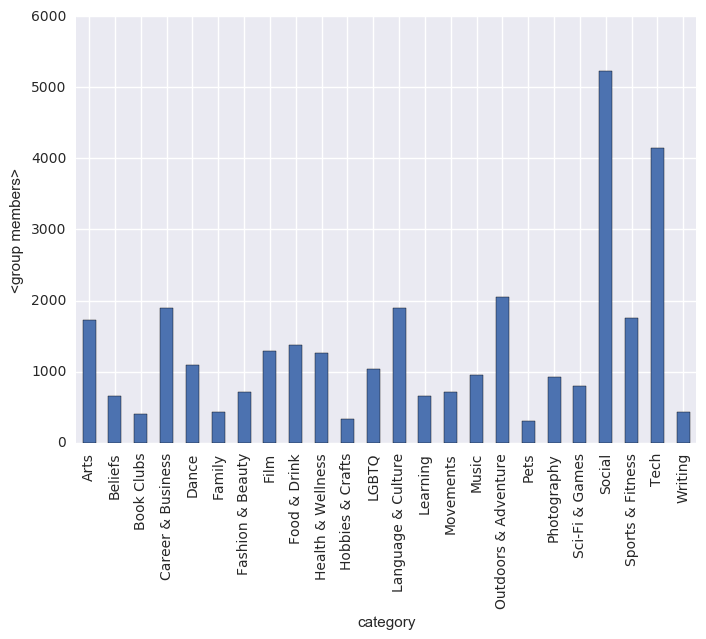

In [157]:
meetup_df.groupby(by="category")["group_members"].mean().plot.bar()
plt.ylabel('<group members>')

In [20]:
# What is the most popular group in each catergory? 
rows_max =  meetup_df.groupby(by="category")["group_members"].apply(lambda x: x.argmax())
list_of_max_cat = []
for row_max in rows_max: 
     list_of_max_cat.append(meetup_df.iloc[row_max][['category', "group_name"]])
max = 0
for i in range(len(list_of_max_cat)):
    if list_of_max_cat[i][1] > max:
        max_name = list_of_max_cat[i][0]
    print list_of_max_cat[i][0] +  ":" , list_of_max_cat[i][1]
    

Arts: "New York Creative Socials" - New York, NY
Beliefs: New York City Atheists Meetings - New York, NY
Book Clubs: The New York Girly Book Club - New York, NY
Career & Business: New York Entrepreneurs & Startup Network (NYESN) - New York, NY
Dance: Salsa New York - New York, NY
Family: The New York Single Parents Meetup Group - New York, NY
Fashion & Beauty: NYC's #1 Fashion Events & Parties (11,000+ members) - New York, NY
Film: The Culture & Film Club - New York, NY
Food & Drink: NYC Dining + Cooking - New York, NY
Health & Wellness: I Meditate NY - New York, NY
Hobbies & Crafts: Create Short Films Together! - New York, NY
LGBTQ: Queer Happy Hour - New York, NY
Language & Culture: Language Exchange NYC - New York, NY
Learning: NYEdTech - New York, NY
Movements: Be Social Change - New York, NY
Music: The New York City Live Music Meetup - New York, NY
Outdoors & Adventure: Hudson Valley Hikers - New York, NY
Pets: NYC Animal Rights - New York, NY
Photography: "The New York City Digit

In [21]:
#How many groups are in each category
meetup_df['category'].value_counts()

Outdoors & Adventure    101
Tech                    101
Music                   100
Photography             100
Food & Drink             99
Movements                99
Family                   98
Health & Wellness        98
Sports & Fitness         97
Sci-Fi & Games           96
Beliefs                  95
Fashion & Beauty         94
Career & Business        94
Film                     93
Dance                    93
Learning                 92
Arts                     92
Hobbies & Crafts         91
Social                   90
LGBTQ                    89
Book Clubs               88
Language & Culture       87
Pets                     86
Writing                  86
Name: category, dtype: int64

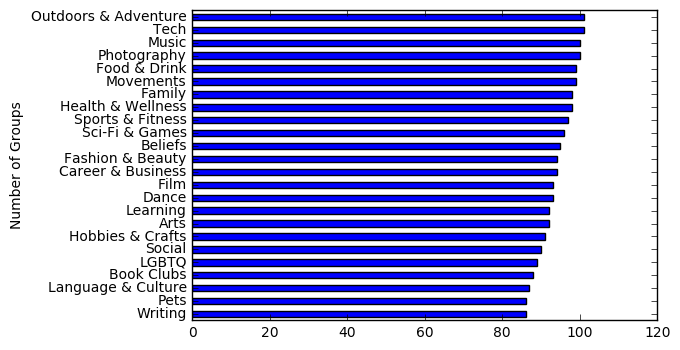

In [22]:
meetup_df['category'].value_counts(ascending=True).plot.barh()
plt.ylabel('Number of Groups')

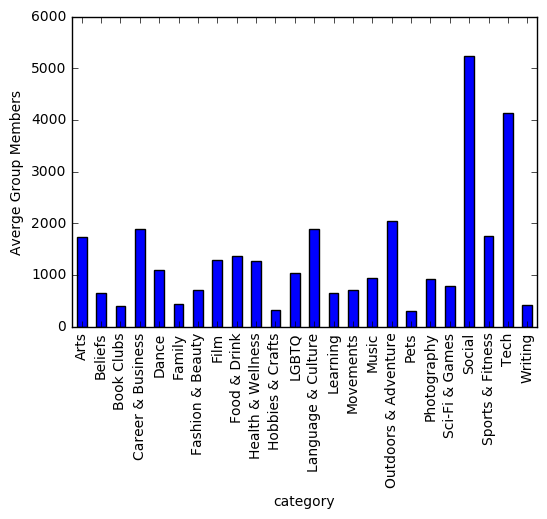

In [23]:
meetup_df.groupby('category')['group_members'].mean().plot.bar()
plt.ylabel('Averge Group Members')

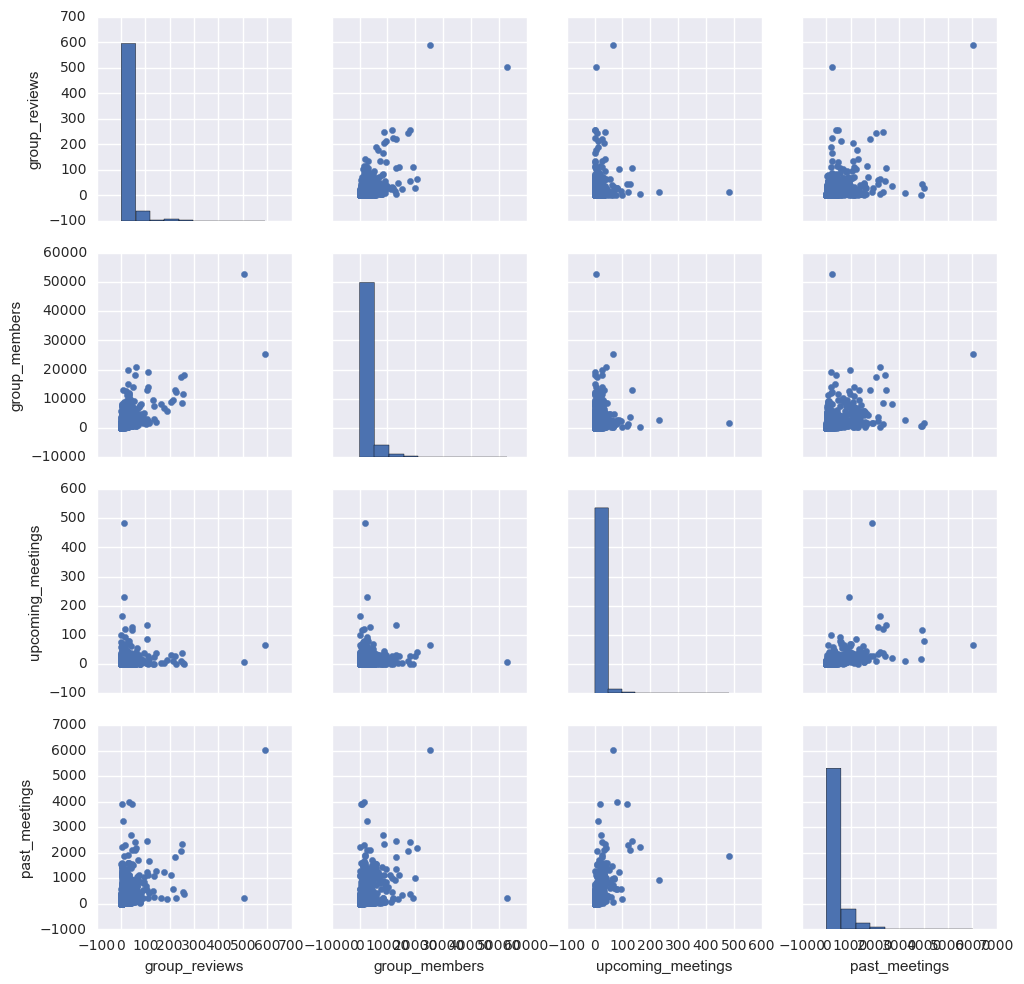

In [33]:
# Is there a relationship between number of group members and past meetings, upcoming meetings, etc.
import seaborn as sns
comp_meetup_df = meetup_df.dropna(axis=0)
meetGrid = sns.PairGrid(comp_meetup_df)
#meetGrid.map(plt.scatter)
meetGrid.map_diag(plt.hist)
meetGrid.map_offdiag(plt.scatter)


In [35]:
meetup_df.corr()

,group_reviews,group_members,upcoming_meetings,past_meetings
group_reviews,1.000000,0.630328,0.040844,0.367192
group_members,0.630328,1.000000,-0.002933,0.319724
upcoming_meetings,0.040844,-0.002933,1.000000,0.610317
past_meetings,0.367192,0.319724,0.610317,1.000000


In [37]:
# Many groups have no information about them. How are many are there?  
missing_meetup = meetup_df.isnull()

In [38]:
np.sum(missing_meetup)

category                    0
upcoming_meeting_date    1001
group_reviews             172
group_members             437
upcoming_meetings         748
upcoming_address         1169
past_meetings            1300
upcoming_meeting_time    1001
group_name                 25
upcoming_meeting_day     1001
dtype: int64

In [129]:
len(meetup_df[(np.sum(missing_meetup, axis=1) == 9)])# completely missing data 

25

In [78]:
missing_groups = meetup_df[(np.sum(missing_meetup, axis=1) == 9)].groupby("category").size()
missing_groups

category
Arts                    1
Beliefs                 1
Book Clubs              1
Career & Business       1
Dance                   1
Family                  1
Fashion & Beauty        1
Film                    1
Food & Drink            1
Health & Wellness       1
Hobbies & Crafts        2
LGBTQ                   1
Language & Culture      1
Learning                1
Movements               1
Music                   1
Outdoors & Adventure    1
Pets                    1
Photography             1
Sci-Fi & Games          1
Social                  1
Sports & Fitness        1
Tech                    1
Writing                 1
dtype: int64

In [136]:
meetup_df[np.sum(missing_meetup, axis=1) == 8]["group_name"]


13                       Muslim-ish of NYC - New York, NY
15      Meet and See the Movie "Kill the Messenger" wi...
16      Real Estate Investing Education, Training & Me...
34      Columbia University Toastmasters Meetup - New ...
142     THE OVER-RATEDS (MAKING AMERICA SAFE AGAIN) - ...
152     NYC Live Video Streaming Professionals Meetup ...
203                   TV/Movies Happy Hour - New York, NY
230     Astoria Queens Dungeons and Dragons/Call of Ct...
245                    Girl Geek Book Club - New York, NY
309     The Real Christian Ladies of New York - New Yo...
355     Christian Young Professionals (NYC) Meetup - N...
479     New York City Grateful Dead Song and Jam Meetu...
535                         The Edge of NY - New York, NY
545           NY Reggae, Dancehall & Tings - Brooklyn, NY
587                            Bi Beauties - New York, NY
630     Gay & Bi Naked Men NYC, 20's 30's 40's - New Y...
690      Longtower Photo Enthusiasts Group - Brooklyn, NY
763           

In [137]:
missing_groups = meetup_df[(np.sum(missing_meetup, axis=1) == 8)].groupby("category").size()
missing_groups

category
Arts                     3
Beliefs                  3
Book Clubs               5
Career & Business        2
Dance                    3
Family                  11
Fashion & Beauty         5
Film                     3
Food & Drink             4
Health & Wellness        3
Hobbies & Crafts         3
LGBTQ                    2
Learning                 4
Movements                4
Music                    3
Outdoors & Adventure     6
Pets                     5
Photography              1
Sci-Fi & Games           3
Social                   4
Sports & Fitness         2
Writing                  5
dtype: int64

In [144]:
# What day of the week is most common 
meetup_df["upcoming_meeting_day"].value_counts()

Sat    327
Fri    210
Sun    178
Thu    153
Wed    137
Tue    136
Mon    117
Name: upcoming_meeting_day, dtype: int64

In [163]:
# What about per category? 
#pd.set_option('display.max_rows', 200)
result = meetup_df.groupby("category")["upcoming_meeting_day"].value_counts()
meetup_df.groupby(['category']).apply(lambda x: x['upcoming_meeting_day'].value_counts().index[0])


category
Arts                    Sat
Beliefs                 Sat
Book Clubs              Sun
Career & Business       Thu
Dance                   Sat
Family                  Sat
Fashion & Beauty        Sun
Film                    Sat
Food & Drink            Sat
Health & Wellness       Sat
Hobbies & Crafts        Sun
LGBTQ                   Sat
Language & Culture      Sat
Learning                Sat
Movements               Wed
Music                   Sat
Outdoors & Adventure    Sat
Pets                    Sat
Photography             Sat
Sci-Fi & Games          Sat
Social                  Fri
Sports & Fitness        Sat
Tech                    Wed
Writing                 Sat
dtype: object

In [167]:
# What about the times of the day? 
meetup_df["upcoming_meeting_time"].value_counts()
meetup_df.groupby(['category']).apply(lambda x: x['upcoming_meeting_time'].value_counts().index[0])


category
Arts                    7:00 PM
Beliefs                 7:00 PM
Book Clubs              7:00 PM
Career & Business       6:30 PM
Dance                   7:00 PM
Family                  7:00 PM
Fashion & Beauty        6:30 PM
Film                    9:30 AM
Food & Drink            6:30 PM
Health & Wellness       7:00 PM
Hobbies & Crafts        7:00 PM
LGBTQ                   7:00 PM
Language & Culture      6:00 PM
Learning                6:30 PM
Movements               7:00 PM
Music                   7:00 PM
Outdoors & Adventure    7:00 PM
Pets                    2:00 PM
Photography             6:00 PM
Sci-Fi & Games          7:00 PM
Social                  6:30 PM
Sports & Fitness        7:00 PM
Tech                    6:30 PM
Writing                 7:00 PM
dtype: object